<a href="https://colab.research.google.com/github/ropbGitHub/Bookish_Bookshop_app/blob/main/SOF_S_NO_9_2_Proyect_IA_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Configuración y Cargar de datos

## 1.1- Installación de Dependecias y configuración

In [1]:
! pip install -q kaggle
! pip install split-folders

In [2]:
import tensorflow as tf
import os

# Evita los errores OOM configurando el crecimiento del consumo de memoria de la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# tf.config.list_physical_devices('GPU')

### 1.1.1 - Descarga de Datos

In [3]:
from google.colab import files
import os

# Para cargar el archivo kaggle.json (llave para uso de Kaggle API)
files.upload()

# Crea un directorio llamado kaggle y copia allí el archivo kaggle.json.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

# Cambia los permisos del archivo.
! chmod 600 ~/.kaggle/kaggle.json

# Desgar de dataset
! kaggle datasets download -d noamaanabdulazeem/jmuben-coffee-dataset

# Descomprimir archivos del dataset
! unzip jmuben-coffee-dataset.zip

# Camibio de nombres del direcorio
os.rename('JMuBEN', 'dataset')
os.rename('dataset/Cerscospora', 'dataset/cerscospora')
os.rename('dataset/Healthy', 'dataset/healthy')
os.rename('dataset/Leaf rust', 'dataset/rust')
os.rename('dataset/Miner', 'dataset/miner')
os.rename('dataset/Phoma', 'dataset/phoma')

Streaming output truncated to the last 5000 lines.
  inflating: JMuBEN/Phoma/2 (837).jpg  
  inflating: JMuBEN/Phoma/2 (838).jpg  
  inflating: JMuBEN/Phoma/2 (839).jpg  
  inflating: JMuBEN/Phoma/2 (84).jpg  
  inflating: JMuBEN/Phoma/2 (840).jpg  
  inflating: JMuBEN/Phoma/2 (841).jpg  
  inflating: JMuBEN/Phoma/2 (842).jpg  
  inflating: JMuBEN/Phoma/2 (843).jpg  
  inflating: JMuBEN/Phoma/2 (844).jpg  
  inflating: JMuBEN/Phoma/2 (845).jpg  
  inflating: JMuBEN/Phoma/2 (846).jpg  
  inflating: JMuBEN/Phoma/2 (847).jpg  
  inflating: JMuBEN/Phoma/2 (848).jpg  
  inflating: JMuBEN/Phoma/2 (849).jpg  
  inflating: JMuBEN/Phoma/2 (85).jpg  
  inflating: JMuBEN/Phoma/2 (850).jpg  
  inflating: JMuBEN/Phoma/2 (851).jpg  
  inflating: JMuBEN/Phoma/2 (852).jpg  
  inflating: JMuBEN/Phoma/2 (853).jpg  
  inflating: JMuBEN/Phoma/2 (854).jpg  
  inflating: JMuBEN/Phoma/2 (855).jpg  
  inflating: JMuBEN/Phoma/2 (856).jpg  
  inflating: JMuBEN/Phoma/2 (857).jpg  
  inflating: JMuBEN/Phoma/2 (85

## 1.2- Eliminar imágenes dudosas

In [4]:
# import cv2
# import imghdr

# data_dir='dataset'

# image_exts = ['jpeg','jpg', 'bmp', 'png']

# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

### 1.2.1 - División de datos (split)

In [5]:
import splitfolders

dataset_dir = 'dataset'

# Ruta al directorio que contiene las carpetas de clasificación
input_dir =  dataset_dir

# Ruta al directorio donde se guardarán las divisiones
output_dir = 'dataset_split'

# Proporciones de división (entrenamiento, validación, prueba)
ratio = (0.7, 0.2, 0.1)

# Realizar la división de los datos
splitfolders.ratio(
    input_dir,
    output = output_dir,
    seed = 42,
    ratio = ratio,
    group_prefix = None
)

Copying files: 58549 files [00:16, 3618.91 files/s]


## 1.3- Carga de datos

In [6]:
import numpy as np
from matplotlib import pyplot as plt

dataset_split_test_dir = 'dataset_split/test'
dataset_split_train_dir = 'dataset_split/train'
dataset_split_val_dir = 'dataset_split/val'

# Creando el conjunto de datos de prueba
dataset_split_test = tf.keras.utils.image_dataset_from_directory(dataset_split_test_dir)

# Creando el conjunto de datos de entrenamiento
dataset_split_train = tf.keras.utils.image_dataset_from_directory(dataset_split_train_dir)

# Creando el conjunto de datos de validación
dataset_split_val = tf.keras.utils.image_dataset_from_directory(dataset_split_val_dir)

Found 5859 files belonging to 5 classes.
Found 40982 files belonging to 5 classes.
Found 11708 files belonging to 5 classes.


In [7]:
# #  Muestra de datos

# dataset_train_iterator = dataset_split_train.as_numpy_iterator()
# dataset_val_iterator = dataset_split_val.as_numpy_iterator()

# # Get another batch from the iterator
# batch_train = dataset_train_iterator.next()
# batch_val = dataset_val_iterator.next()

# n = 0
# for class_name in dataset_split_train.class_names:
#   print(f'{n}:{class_name}', end=" ")
#   n += 1

# print('\ndataset_train:', batch_train[0].shape, batch_train[1])

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch_train[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch_train[1][idx])

# print('dataset_val:', batch_val[0].shape, batch_val[1])

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch_val[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch_val[1][idx])



# 2- Procesar datos

## 2.1- Escalar datos


In [8]:
dataset_model_test = dataset_split_test.map(lambda x, y: (x/255, y))
dataset_model_train = dataset_split_train.map(lambda x, y: (x/255, y))
dataset_model_val = dataset_split_val.map(lambda x, y: (x/255, y))

In [9]:
# #  Muestra de datos

# dataset_train_scaled_iterator = dataset_train.as_numpy_iterator()
# dataset_val_scaled_iterator = dataset_val.as_numpy_iterator()

# batch_train = dataset_train_scaled_iterator.next()
# batch_val = dataset_val_scaled_iterator.next()

# print ('dataset_train: ', batch_train[0].max(), batch_train[0].min(), batch_train[1])

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch_train[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch_train[1][idx])

# print ('dataset_val: ', batch_val[0].max(), batch_val[0].min(), batch_val[1])

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch_val[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch_val[1][idx])

# 3- Modelo de Aprendizaje

## 3.1- Contrucción de modelo de aprendizaje profundo

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Capa convolucional: 16 filtros, kernel 3x3, activación ReLU
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
# Capa de pooling para reducir las dimensiones espaciales
model.add(MaxPooling2D())

# Capa convolucional: 32 filtros, kernel 3x3, activación ReLU
model.add(Conv2D(32, (3,3), activation='relu'))
# Capa de pooling
model.add(MaxPooling2D())

# Capa convolucional: 16 filtros, kernel 3x3, activación ReLU
model.add(Conv2D(16, (3,3), activation='relu'))
# Capa de pooling
model.add(MaxPooling2D())

# Aplanar la salida de la última capa de pooling
model.add(Flatten())

# Capa densamente conectada con 256 unidades, activación ReLU
model.add(Dense(256, activation='relu'))

# Capa de dropout para evitar el sobreajuste
model.add(Dropout(0.5))

# Capa de salida con 5 unidades (por las 5 clases), activación softmax para clasificación multiclase
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)      

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from keras.regularizers import l2

# model = Sequential()

# # Primera capa convolucional con normalización
# model.add(Conv2D(16, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

# # Segunda capa convolucional con normalización
# model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

# # Tercera capa convolucional con normalización
# model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

# # Cuarta capa convolucional con normalización
# model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

# # Capa de aplanado
# model.add(Flatten())

# # Capa densamente conectada con normalización
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())

# # Capa de dropout
# model.add(Dropout(0.5))

# # Otra capa densa
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())

# # Otra capa de dropout
# model.add(Dropout(0.5))

# # Capa de salida
# model.add(Dense(5, activation='softmax'))

# # Compilación del modelo
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Resumen del modelo
# model.summary()


## 3.2- Entrenamiento

In [12]:
print (f'Cantidad original - test: {len(dataset_model_test)}, train: {len(dataset_model_train)}, val: {len(dataset_model_val)}')

n_resize = .3

test_size = int(len(dataset_model_test)*n_resize)
train_size = int(len(dataset_model_train)*n_resize)
val_size = int(len(dataset_model_val)*n_resize)

print (f'Cantidad recortada - test: {test_size}, train: {train_size}, val: {val_size}')

dataset_model_test_resize = dataset_model_test.take(test_size)
dataset_model_train_resize = dataset_model_train.take(train_size)
dataset_model_val_resize = dataset_model_val.take(val_size)

Cantidad original - test: 184, train: 1281, val: 366
Cantidad recortada - test: 55, train: 384, val: 109


In [13]:
! mkdir /content/logs

In [18]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# Escoger conqué datos trabajar

# # Cantidad original
# data_train = dataset_model_train
# data_val = dataset_model_val

# Cantidad recortada
data_train = dataset_model_train_resize
data_val = dataset_model_val_resize

n_epochs = 10

hist = model.fit(
    data_train,
    epochs = n_epochs,
    validation_data = data_val,
    callbacks = [tensorboard_callback]
)

Epoch 1/10
384/384 [==============================] - 28s 66ms/step - loss: 0.3699 - accuracy: 0.8599 - val_loss: 0.0539 - val_accuracy: 0.9885
Epoch 2/10
384/384 [==============================] - 24s 62ms/step - loss: 0.0764 - accuracy: 0.9757 - val_loss: 0.0154 - val_accuracy: 0.9977
Epoch 3/10
384/384 [==============================] - 26s 66ms/step - loss: 0.0618 - accuracy: 0.9801 - val_loss: 0.0107 - val_accuracy: 0.9974
Epoch 4/10
384/384 [==============================] - 23s 58ms/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0061 - val_accuracy: 0.9977
Epoch 5/10
384/384 [==============================] - 23s 58ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
384/384 [==============================] - 23s 59ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0599 - val_accuracy: 0.9788
Epoch 7/10
384/384 [==============================] - 28s 72ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0028 - val_accuracy:

## 3.3- Plot Performance

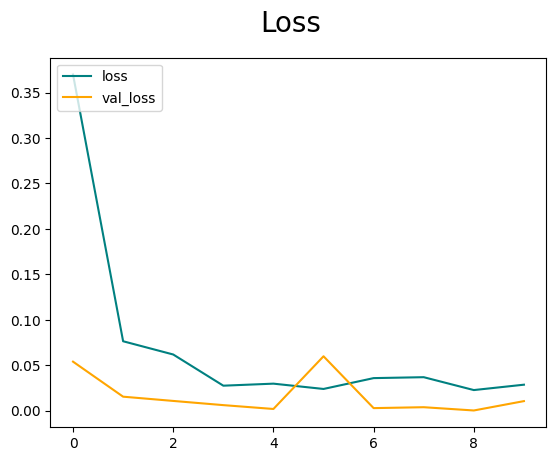

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

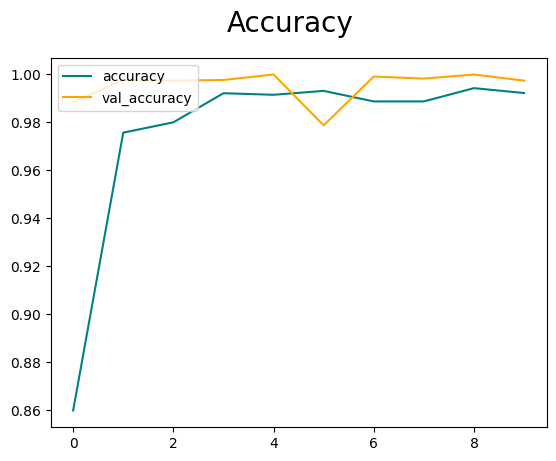

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4- Evaluación de resultados

## 4.1- Evaluación

In [21]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# data_test = dataset_model_test
data_test = dataset_model_test_resize

for batch in data_test.as_numpy_iterator():
    X, y = batch
    # Convertir las etiquetas a codificación one-hot
    y = to_categorical(y, num_classes=5)
    yhat = model.predict(X)

    # Actualizar el estado de las métricas
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Imprimir los valores de las métricas
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Categorical Accuracy: {acc.result().numpy()}')

1/1 [==============================] - 0s 32ms/step
Precision: 0.9982954263687134
Recall: 0.9982954263687134
Categorical Accuracy: 0.9982954263687134


1/1 [==============================] - 0s 74ms/step
Etiqueta Predicha: 4 | Etiqueta Verdadera: 4
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 4 | Etiqueta Verdadera: 4
Etiqueta Predicha: 3 | Etiqueta Verdadera: 3
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 0 | Etiqueta Verdadera: 0
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 4 | Etiqueta Verdadera: 4
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 1 | Etiqueta Verdadera: 1
Etiqueta Predicha: 2 | Etiqueta Verdadera: 2
Etiqueta Predicha: 4 | Etiqueta Verdadera: 4
Eti

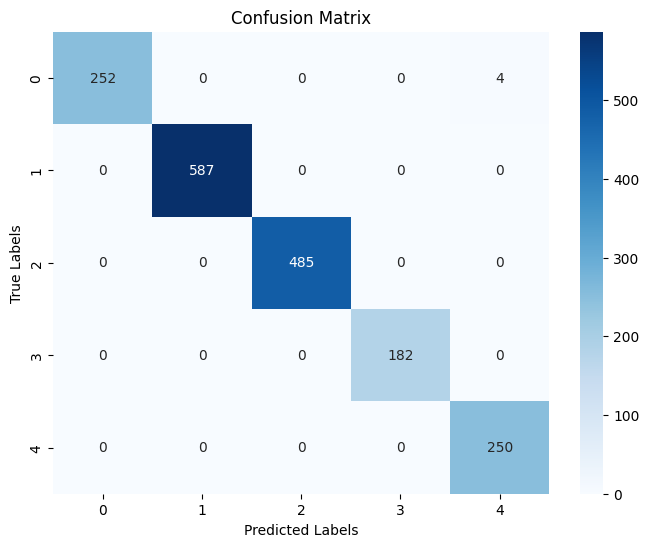

In [22]:
# Matríz de Confuación

from sklearn.metrics import confusion_matrix

# Crear un diccionario para mapear los enteros a los nombres de carpeta
class_names = {0: 'cerscospora', 1: 'healthy', 2: 'miner', 3: 'phoma', 4: 'rust'}

# Crear una lista para almacenar las etiquetas verdaderas y predichas
true_labels = []
predicted_labels = []

# dataset_cm = dataset_dir
# dataset_cm = dataset_slpit_test_dir
dataset_cm = dataset_model_test_resize

# Obtener las etiquetas verdaderas y predichas del modelo
for batch in dataset_cm:
    images, labels = batch
    true_labels.extend(labels.numpy())  # Convertir las etiquetas a una lista de Python
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

    # Imprimir la cadena de texto con las etiquetas predichas y verdaderas
    for pred, true in zip(np.argmax(predictions, axis=1), labels.numpy()):
        print(f"Etiqueta Predicha: {pred} | Etiqueta Verdadera: {true}")

# Crear la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión como un mapa de calor
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 4.2- Prueba

In [24]:
# img_test = 'dataset/healthy/1 (1507).jpg'
# img = cv2.imread(img_test)
# plt.imshow(img)
# plt.show()

In [25]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [26]:
# yhat = model.predict(np.expand_dims(resize/255, 0))

In [27]:
# if yhat > 0.5:
#     # print(f'Predicted class is Sad')
# else:
#     print(f'Predicted class is Happy')

In [29]:
import os
import cv2
import tensorflow as tf
import numpy as np

# directory = dataset_dir
directory = dataset_split_test_dir

class_names = ['cerscospora', 'healthy', 'miner', 'phoma', 'rust']

# Iterar a través de todos los subdirectorios
for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    # Asegurarse de que sea un directorio
    if os.path.isdir(subdir_path):
        # Iterar a través de todos los archivos en el subdirectorio
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            # Leer la imagen
            img = cv2.imread(file_path)
            # Redimensionar la imagen
            resize = tf.image.resize(img, (256, 256))
            # Predecir la clase
            yhat = model.predict(np.expand_dims(resize/255, 0))
            predicted_class = np.argmax(yhat)
            print(f'File: {file_path}, Predicted class is {class_names[predicted_class]}')


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 43ms/step
File: dataset_split/test/cerscospora/9 (1045).jpg, Predicted class is miner
1/1 [==============================] - 0s 41ms/step
File: dataset_split/test/cerscospora/9 (2568).jpg, Predicted class is phoma
1/1 [==============================] - 0s 37ms/step
File: dataset_split/test/cerscospora/9 (3558).jpg, Predicted class is miner
1/1 [==============================] - 0s 36ms/step
File: dataset_split/test/cerscospora/9 (1271).jpg, Predicted class is phoma
1/1 [==============================] - 0s 43ms/step
File: dataset_split/test/cerscospora/9 (2239).jpg, Predicted class is cerscospora
1/1 [==============================] - 0s 44ms/step
File: dataset_split/test/cerscospora/4 (240).jpg, Predicted class is miner
1/1 [==============================] - 0s 28ms/step
File: dataset_split/test/cerscospora/7 (96).jpg, Predicted class is miner
1/1 [==============================] - 0s 38ms/ste

In [28]:
# import numpy as np

# img_test = 'dataset_extra/test/cerscospora/4 (1021).jpg'

# img = cv2.imread(img_test)
# # plt.imshow(img)
# # plt.show()

# resize = tf.image.resize(img, (256,256))
# # plt.imshow(resize.numpy().astype(int))
# # plt.show()

# yhat = model.predict(np.expand_dims(resize/255, 0))

# # print(yhat)

# # Encontrar la clase con la mayor probabilidad
# predicted_class = np.argmax(yhat)

# class_names = ['cerscospora', 'healthy', 'miner', 'phoma', 'rust']

# print(f'Predicted class is {class_names[predicted_class]}')

# Save the Model

In [30]:
# from tensorflow.keras.models import load_model

# model.save(os.path.join('models','imageclassifier.h5'))

# new_model = load_model('imageclassifier.h5')

# new_model.predict(np.expand_dims(resize/255, 0))